In [7]:
import os
import glob
import yaml
from ultralytics.data.utils import visualize_image_annotations

In [12]:
# imgs_path = '/home/data/processed/kaggle_v0/cnp_vik_full/val/images'
# imgs_path = '/home/data/processed/kaggle_v0/cnp_vik_full-synthetic-only-mid/test'
# imgs_path = '/home/data/processed/kaggle_v0/cnp_vik-mid-orig-labels/val'
imgs_path = '/home/data/pace/toycar_can_v0/train/images'
# yaml_path = '/home/data/objects365.yaml'

# imgs_path = imgs_path + '/images' if not imgs_path.endswith('/images') else imgs_path
# '/home/data/processed/kaggle_v0/cut_and_paste_vik_test/images'
paths = glob.glob(os.path.join(imgs_path, '*'))
# paths.sort(key=lambda x:int(os.path.basename(x).split('_')[0]))

In [13]:
# # load yaml file into label_map using yaml library
# with open(yaml_path, 'r') as f:
# 	full_yaml = yaml.safe_load(f)
# 	label_map = full_yaml['names']
# label_map = {}

class KeyAsValueDict(dict):
    def __missing__(self, key):
        return key

# Example usage:
label_map = KeyAsValueDict()

In [14]:
paths[0], label_map

('/home/data/pace/toycar_can_v0/train/images/181_27.png', {})

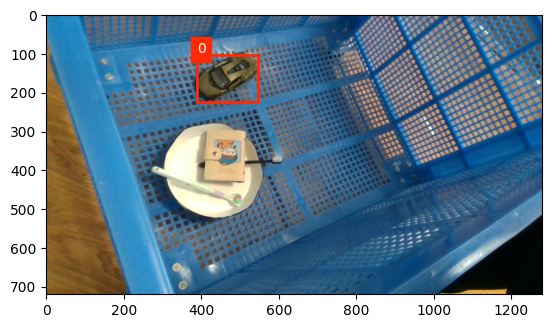

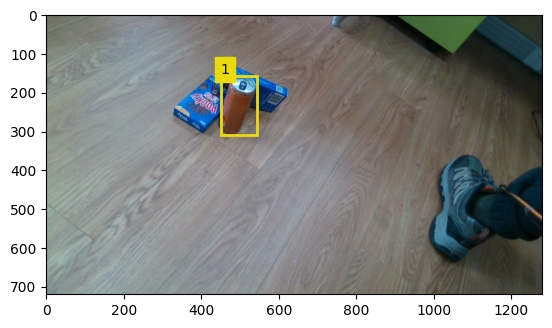

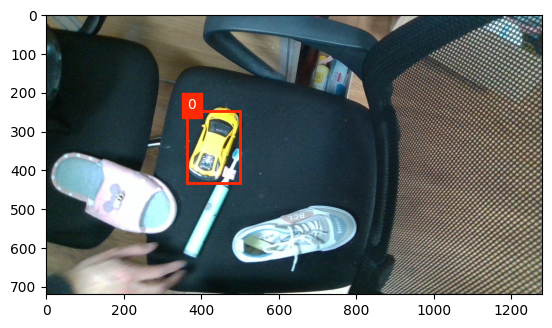

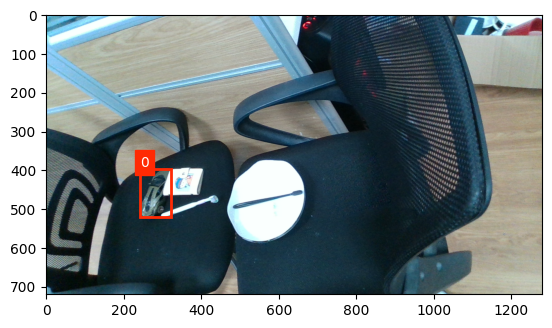

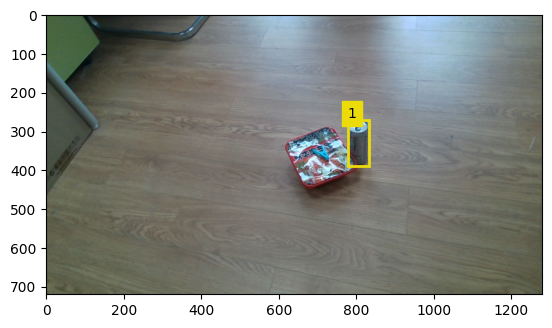

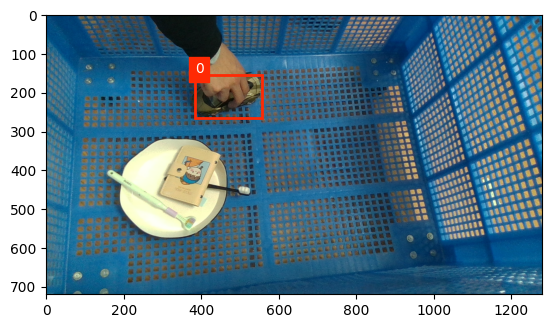

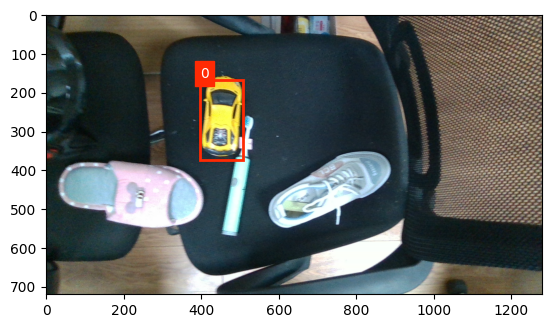

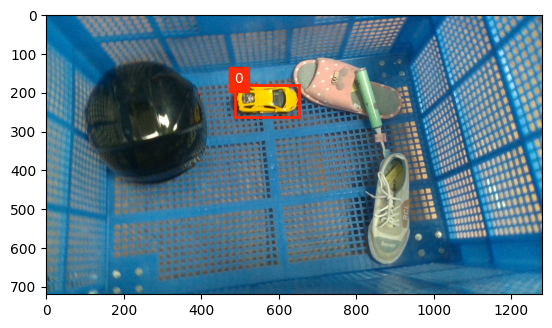

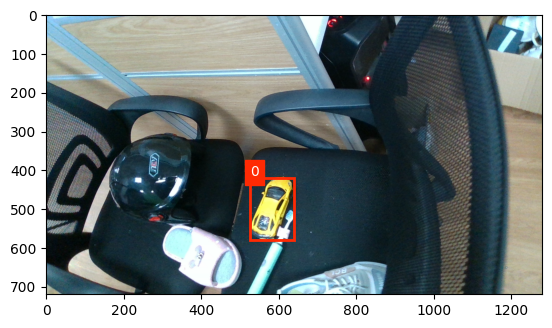

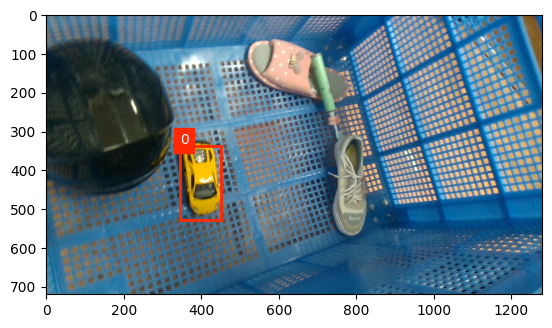

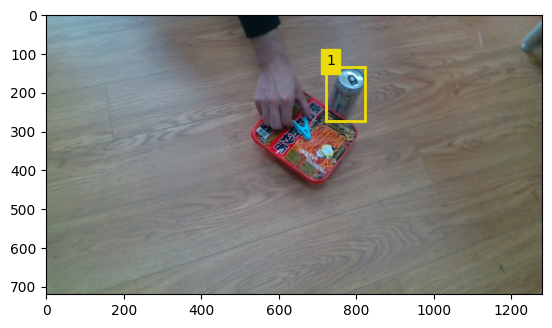

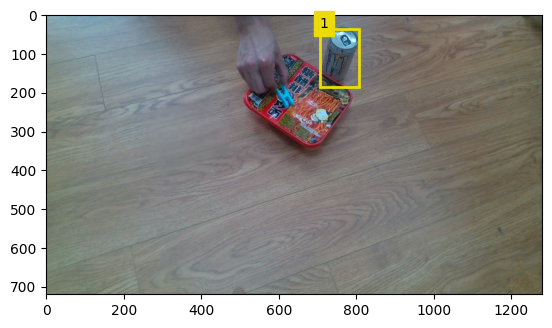

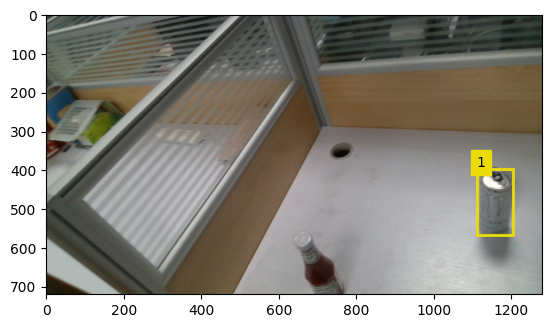

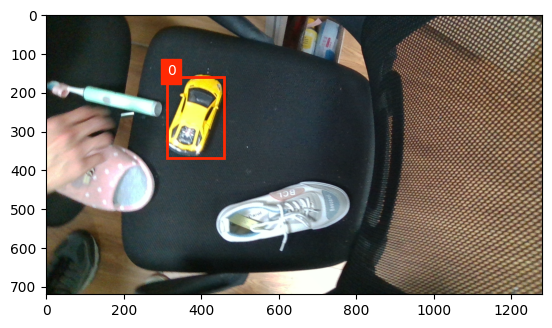

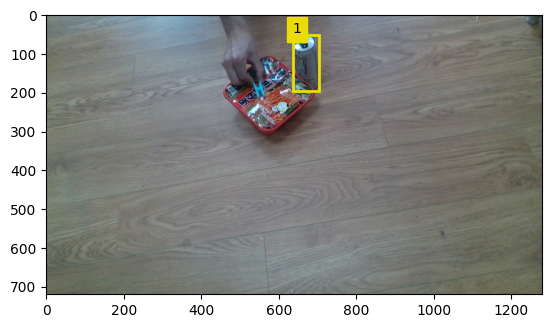

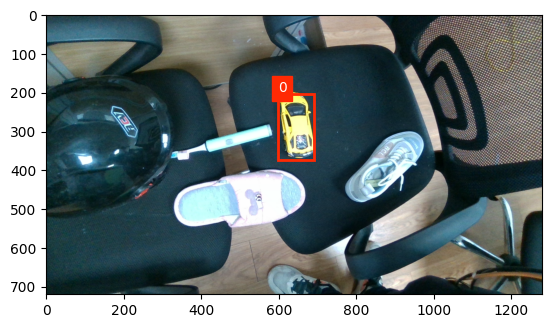

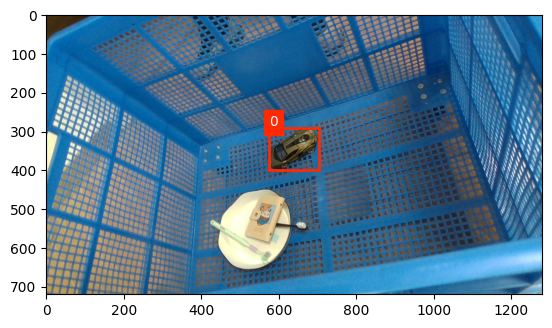

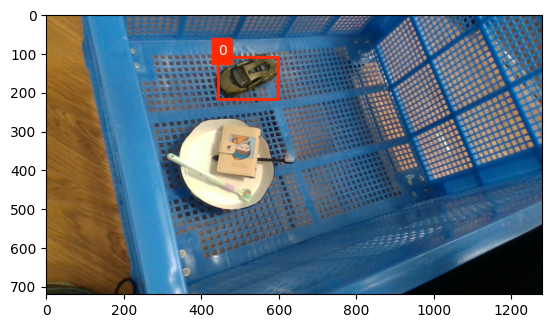

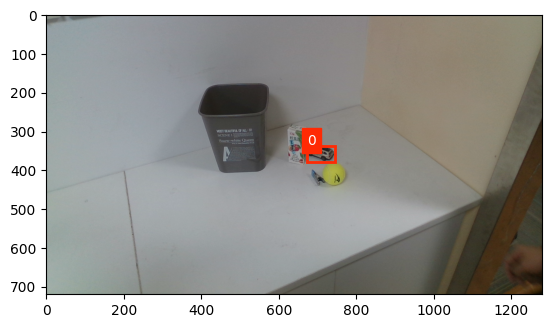

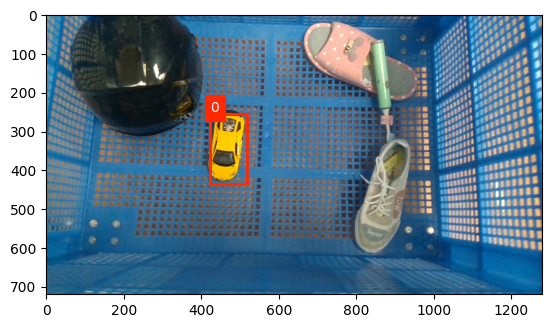

In [16]:
N = 20
for idx in range(N):
	img_path = paths[idx]
	label_path = img_path.replace('/images', '/labels').replace('.jpg', '.txt').replace('.png', '.txt')
	# label_path = f"/home/data/pace/sample_labels/{img_path.split('/')[-1].replace('.png', '.txt')}
	# label_path = "_".join(img_path.replace('/images', '/labels').split('_')[:-1]) + '.txt' ### when 1_none and 1_box have same label
	visualize_image_annotations(img_path, label_path, label_map)

In [24]:
labels_path

'/home/data/pace/toycar_can_v0/train/labels/183_73.png'

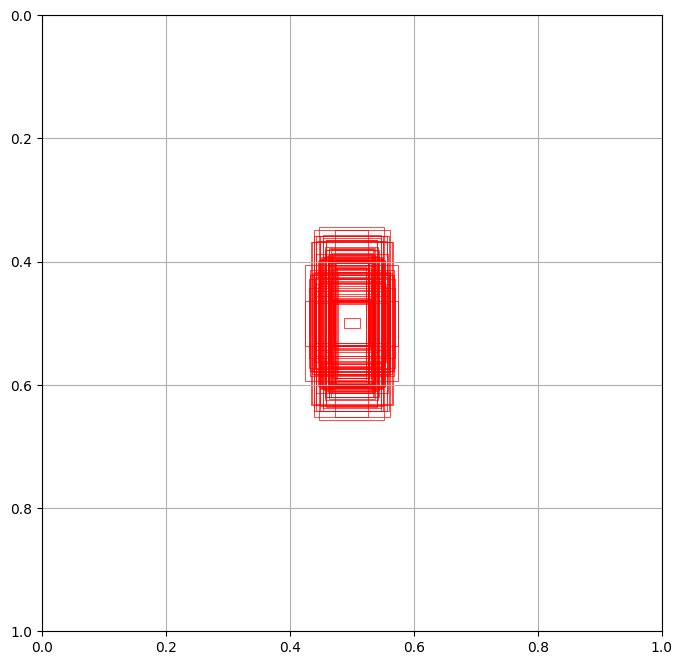

In [36]:
import matplotlib.pyplot as plt
## read all the darknet label txt files in a directory and plot all bounding boxes combined
bboxes = []
labels_path = imgs_path.replace('/images', '/labels')
for label_path in glob.glob(os.path.join(labels_path, '*.txt'))[:100]:
	with open(label_path, 'r') as f:
		for line in f:
			class_id, x_center, y_center, width, height = map(float, line.strip().split())
			bboxes.append((class_id, x_center, y_center, width, height))

plt.figure(figsize=(8, 8))
ax = plt.gca()

for class_id, x_center, y_center, width, height in bboxes:
	# x1 = 0.5
	# y1 = 0.5
	x1 = 0.5 - width / 2
	y1 = 0.5 - height / 2
	rect = plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=0.5)
	ax.add_patch(rect)

plt.xlim(0, 1)
plt.ylim(1, 0)  # Inverted y-axis for image coordinates
plt.grid(True)
plt.show()
